### Austin Housing Market Prediction Analysis


#### High Level Description:
The below project was performed between Project R in RStudio and Python. Both notebooks are available in this repository. This project in volved Exploratory Data Analysis performed and some data cleansing in RStudio. Visual analysis and predictive modeling were performed in Python. The goal of the project was to predict home prices for the Austin, Texas market with an above 60 percent accuracy.


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math



In [2]:
#Increase display value for wide data views
pd.set_option('display.max_columns', None)

In [3]:
#Load data into a dataframe
current_file = "austinHousingData.csv"

df_austin_housing = pd.read_csv(current_file)

In [4]:
#Check the dimension of the table/look at the data
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (15171, 47)


In [4]:
#Print the columns names
print("Column names: ", df_austin_housing.columns)

Column names:  Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')


In [5]:
#View the information on the data
df_austin_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [6]:
#Check out a few rows
df_austin_housing.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [7]:
#What type of variables are in the table before dropping variables.
print("Describe Data")
print(df_austin_housing.describe())

Describe Data
               zpid       zipcode      latitude     longitude  \
count  1.517100e+04  15171.000000  15171.000000  15171.000000   
mean   1.044193e+08  78735.932964     30.291596    -97.778532   
std    3.179426e+08     18.893475      0.096973      0.084715   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941115e+07  78727.000000     30.203313    -97.838009   
50%    2.949441e+07  78739.000000     30.284416    -97.769539   
75%    7.033762e+07  78749.000000     30.366585    -97.717903   
max    2.146313e+09  78759.000000     30.517323    -97.569504   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     15171.000000  15171.000000   15171.000000  15171.000000   
mean          1.994085      1.229187       1.224507   1988.554743   
std           0.053102      1.352117       1.352732     21.579458   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.980000      0.000000       0.000000   1

In [9]:
#Descibe the data
print("Summarized Data")
print(df_austin_housing.describe(include=['O']))

Summarized Data
          city          streetAddress  \
count    15171                  15171   
unique       9                  15164   
top     austin  238 Lavaca Heights Dr   
freq     15020                      2   

                                              description       homeType  \
count                                               15171          15171   
unique                                              15133             10   
top     Coming soon! Photos and details will be availa...  Single Family   
freq                                                   12          14241   

       latest_saledate latestPriceSource  \
count            15171             15171   
unique             958               225   
top         2019-06-28    Agent Provided   
freq                68             10486   

                                                homeImage  
count                                               15171  
unique                                              1517

In [10]:
#Check of missing data values.
for a in df_austin_housing.columns:
    miss=df_austin_housing[a].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(a,miss))
    else:
        print('{} has NO missing values'.format(a))

zpid has NO missing values
city has NO missing values
streetAddress has NO missing values
zipcode has NO missing values
description has NO missing values
latitude has NO missing values
longitude has NO missing values
propertyTaxRate has NO missing values
garageSpaces has NO missing values
hasAssociation has NO missing values
hasCooling has NO missing values
hasGarage has NO missing values
hasHeating has NO missing values
hasSpa has NO missing values
hasView has NO missing values
homeType has NO missing values
parkingSpaces has NO missing values
yearBuilt has NO missing values
latestPrice has NO missing values
numPriceChanges has NO missing values
latest_saledate has NO missing values
latest_salemonth has NO missing values
latest_saleyear has NO missing values
latestPriceSource has NO missing values
numOfPhotos has NO missing values
numOfAccessibilityFeatures has NO missing values
numOfAppliances has NO missing values
numOfParkingFeatures has NO missing values
numOfPatioAndPorchFeatures

Note: Appear we have zero missing data.

In [4]:
#Make a copy before dropping elements
df_austin_housing_copy_1 = df_austin_housing.copy(deep=True)

In [9]:
#Review values for select features
df_austin_housing['numOfAccessibilityFeatures'].value_counts()

0    15051
1       78
2       26
3        6
4        5
5        3
6        1
8        1
Name: numOfAccessibilityFeatures, dtype: int64

In [10]:
#Review values for select features
df_austin_housing['numOfParkingFeatures'].value_counts()

2    7200
1    5395
3    1719
0     617
4     212
5      24
6       4
Name: numOfParkingFeatures, dtype: int64

In [11]:
#Review values for select features
df_austin_housing['numOfPatioAndPorchFeatures'].value_counts()

0    9254
1    2956
2    2027
3     728
4     171
5      28
6       4
7       2
8       1
Name: numOfPatioAndPorchFeatures, dtype: int64

In [12]:
#Review values for select features
df_austin_housing['numOfSecurityFeatures'].value_counts()

0    10549
1     2821
2     1265
3      433
4       84
5       17
6        2
Name: numOfSecurityFeatures, dtype: int64

In [13]:
#Review values for select features
df_austin_housing['numOfWaterfrontFeatures'].value_counts()

0    15137
1       26
2        8
Name: numOfWaterfrontFeatures, dtype: int64

In [14]:
#Review values for select features
df_austin_housing['numOfWindowFeatures'].value_counts()

0    12520
1     2183
2      425
3       42
4        1
Name: numOfWindowFeatures, dtype: int64

In [15]:
#Review values for select features
df_austin_housing['numOfCommunityFeatures'].value_counts()

0    14962
1      180
2       11
3        5
5        4
4        4
6        3
7        1
8        1
Name: numOfCommunityFeatures, dtype: int64

In [18]:
#Review values for select features
df_austin_housing['hasSpa'].value_counts()

False    13972
True      1199
Name: hasSpa, dtype: int64

In [19]:
#Review values for select features
df_austin_housing['hasView'].value_counts()

False    11716
True      3455
Name: hasView, dtype: int64

In [4]:
#Elements to be dropped
df_austin_housing=df_austin_housing.drop(['zpid', 'description', 'numOfPhotos', 'propertyTaxRate',
                                         'numOfAccessibilityFeatures','numOfParkingFeatures',
                                         'homeImage','hasView','hasSpa'], axis=1)

Reason for drop the following attributes:

zpid = ID number not needed in the analysis and provides no value
description = Not need in the analysis as it is all text
numOfPhotos = number of photos column is not revelent to analysis
propertyTaxRate = the mean, min and max are so close not sure this will have a impact on the model
numOfElementarySchools = Mean near is one don't believe there is a big enough number to influence the model
numOfMiddleSchools = Mean near is one don't believe there is a big enough number to influence the model  
numOfHighSchools = Mean near is one don't believe there is a big enough number to influence the model
numOfAccessibilityFeatures = zero is the largest number with 15,051
numOfParkingFeatures = ???
numOfPatioAndPorchFeatures = Majority is zero removing it will not make a difference
numOfSecurityFeatures = There are 10,549 zero dropping the attribute will not impact the model
numOfWaterfrontFeatures = Very few counts above zero. Will not impact model
numOfWindowFeatures = Removing it will not impact model
numOfCommunityFeatures = High number of zero will not imapct model if removed
homeImage = Images of home are not need by the model
numOfPrimarySchools = Will not impact the model
hasSpa = Has spa we get back 13,972 false way over the 50%
hasView = Has view we get back 11,716 I believe this is very sujective
numOfPrimarySchools = number of school might not matter as most people are concerned with school rating vs. number of schools in the area.

In [5]:
#Print the columns names after drop
print("Column names: ", df_austin_housing.columns)

Column names:  Index(['city', 'streetAddress', 'zipcode', 'latitude', 'longitude',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfAppliances',
       'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')


In [5]:
#What type of variables are in the table after dropping variables.
print("Describe Data")
print(df_austin_housing.describe())

Describe Data
            zipcode      latitude     longitude  garageSpaces  parkingSpaces  \
count  15171.000000  15171.000000  15171.000000  15171.000000   15171.000000   
mean   78735.932964     30.291596    -97.778532      1.229187       1.224507   
std       18.893475      0.096973      0.084715      1.352117       1.352732   
min    78617.000000     30.085030    -98.022057      0.000000       0.000000   
25%    78727.000000     30.203313    -97.838009      0.000000       0.000000   
50%    78739.000000     30.284416    -97.769539      1.000000       1.000000   
75%    78749.000000     30.366585    -97.717903      2.000000       2.000000   
max    78759.000000     30.517323    -97.569504     22.000000      22.000000   

          yearBuilt   latestPrice  numPriceChanges  latest_salemonth  \
count  15171.000000  1.517100e+04     15171.000000      15171.000000   
mean    1988.554743  5.127677e+05         3.032892          6.733043   
std       21.579458  4.531853e+05         2.48739

In [26]:
#Load data into a dataframe
new_file = "austinHousingDataupdated.csv"

In [23]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (15171, 26)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  11
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  2
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    26 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


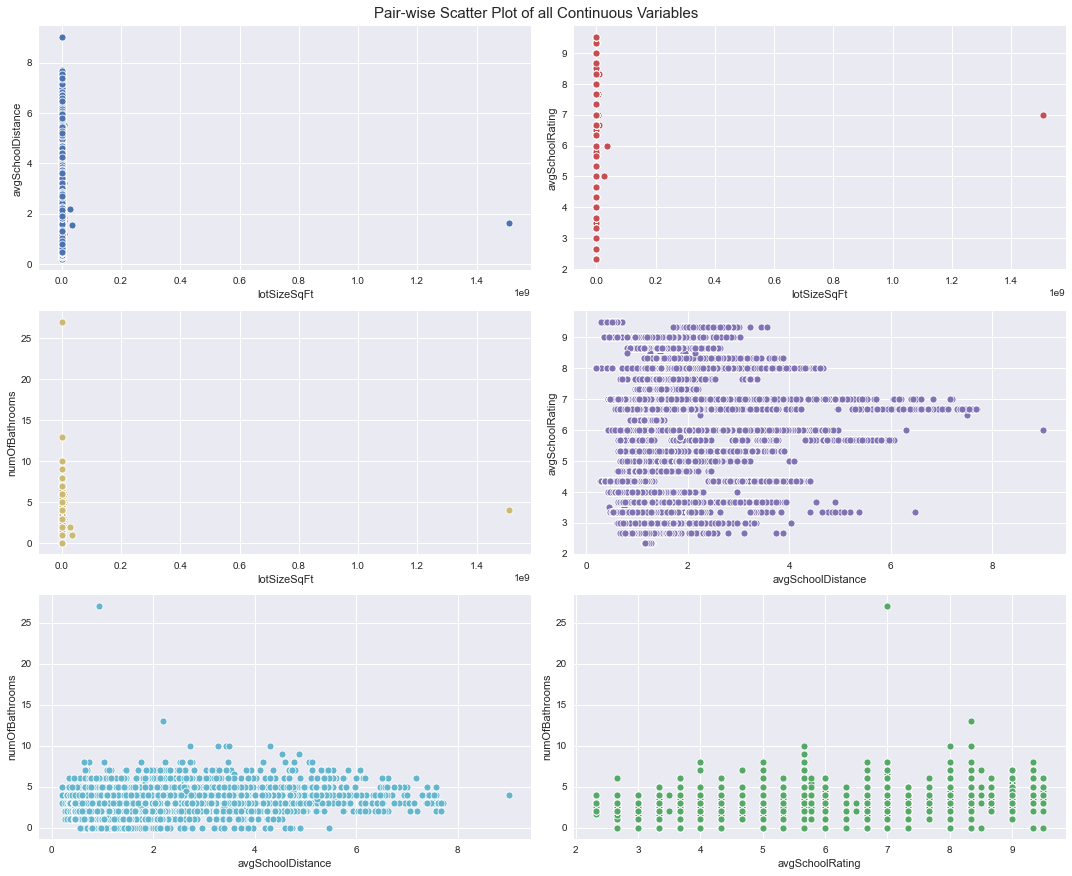

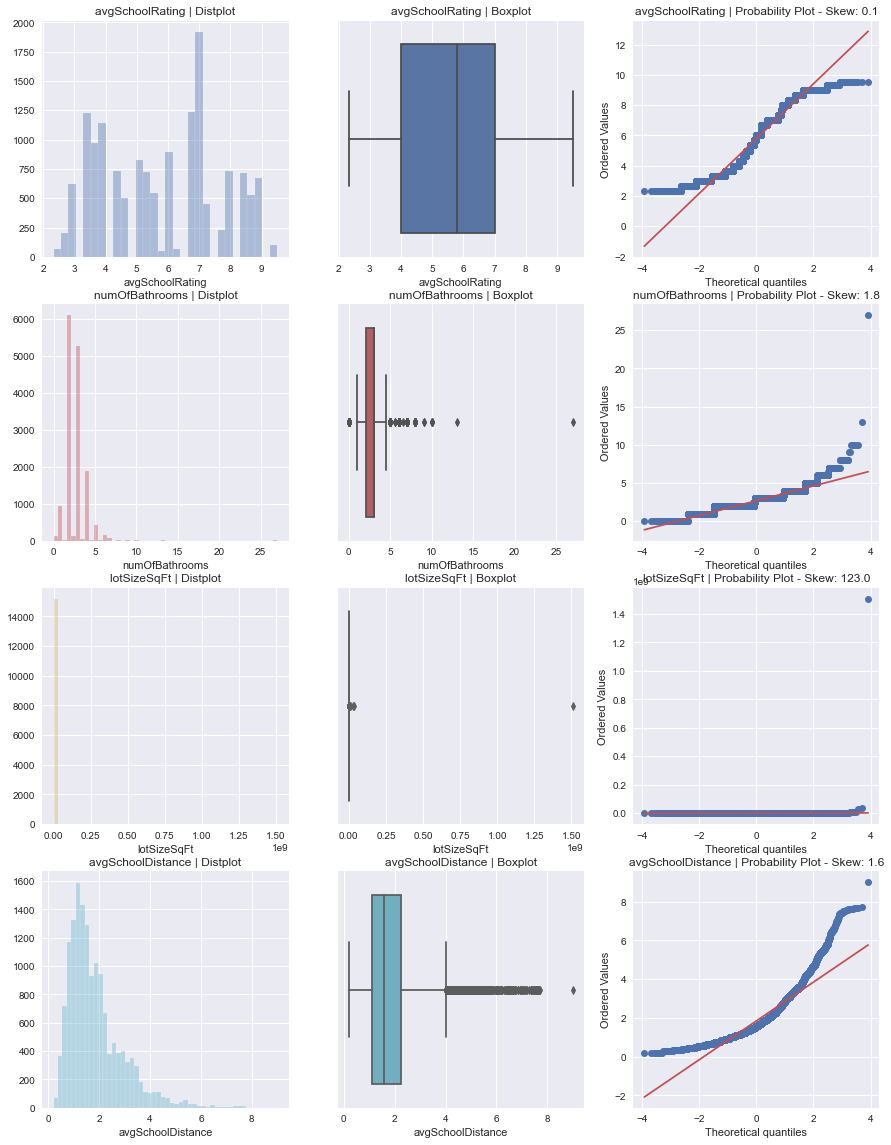

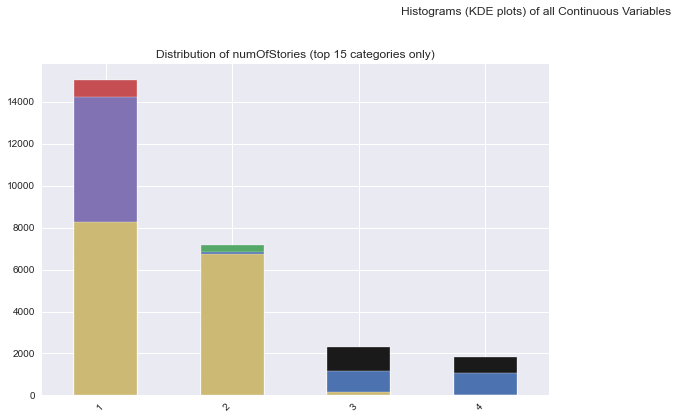

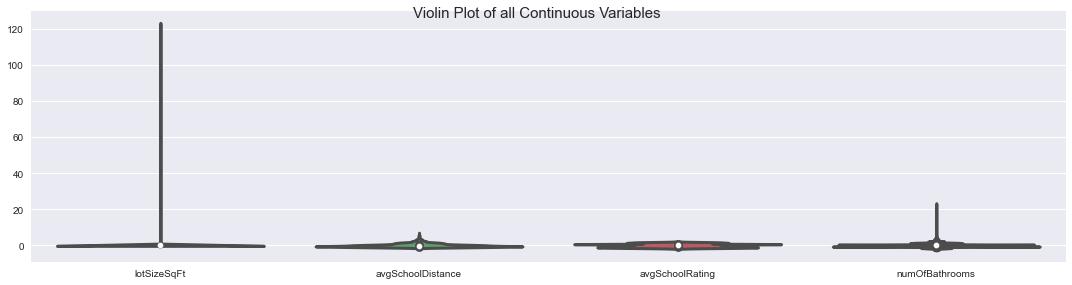

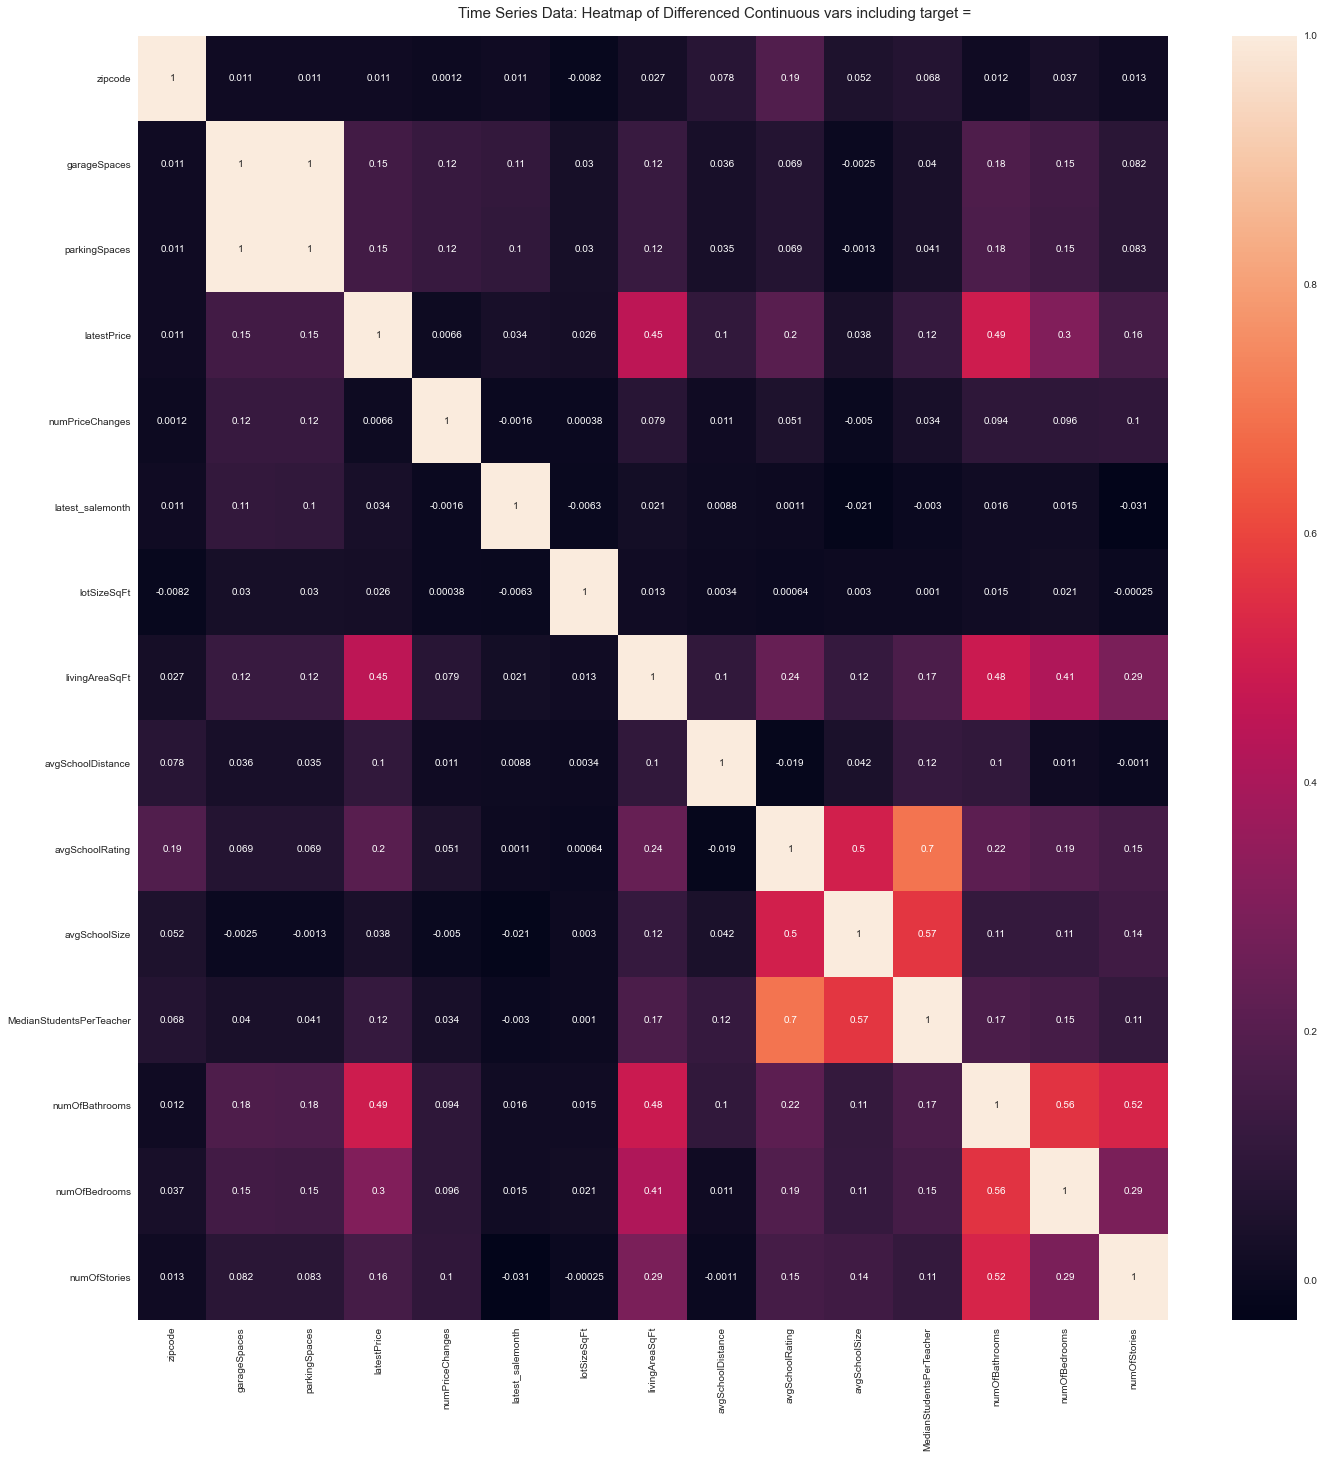

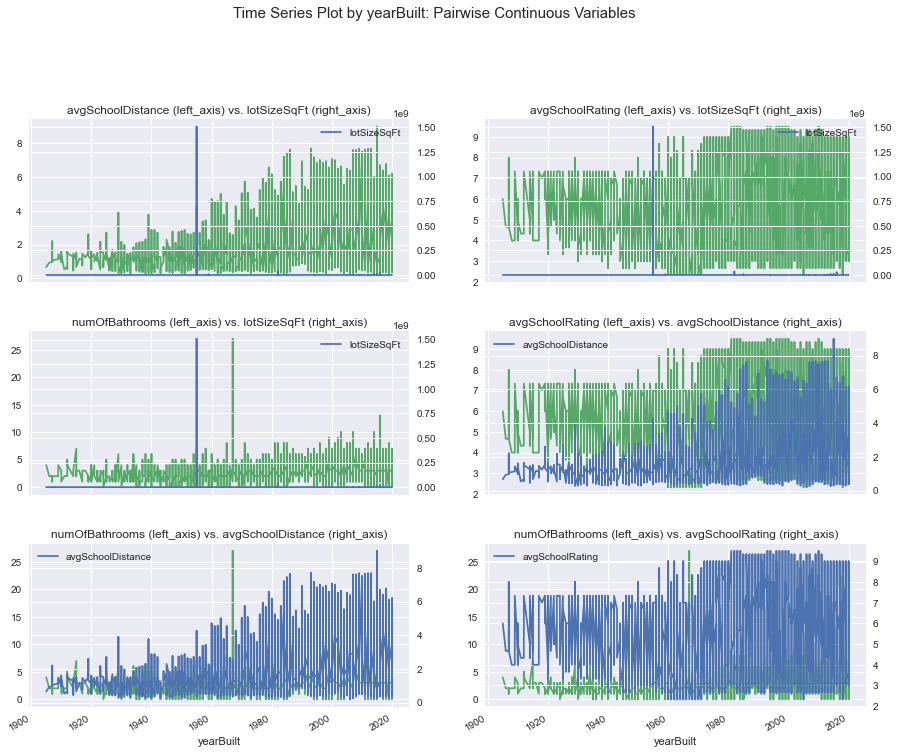

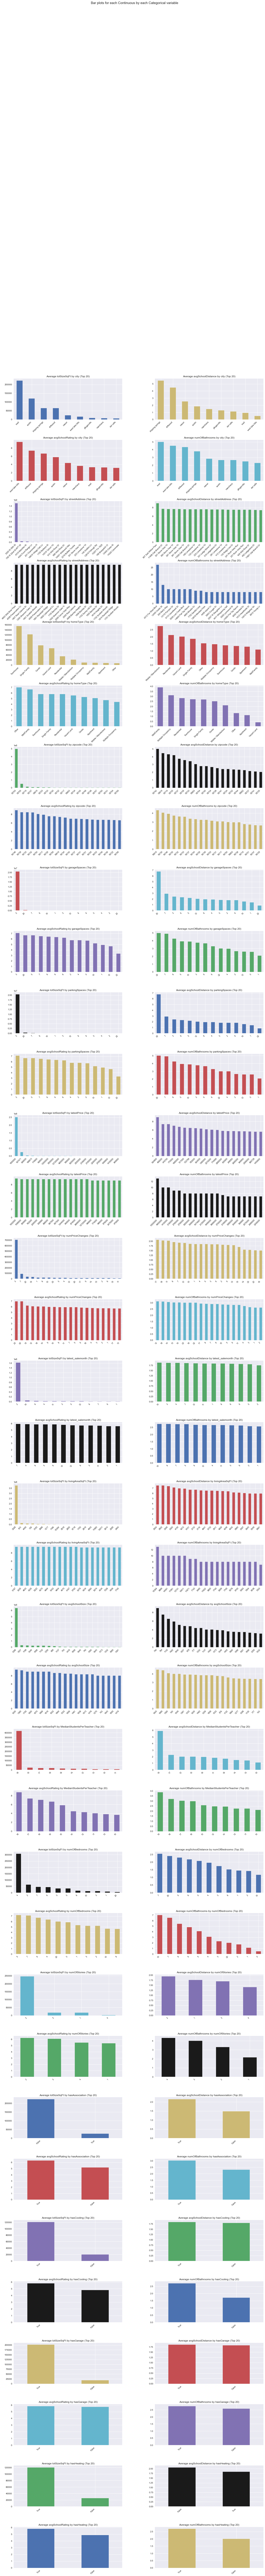

Time to run AutoViz (in seconds) = 31.507

 ###################### VISUALIZATION Completed ########################


In [27]:
#Auto visual creates a wide range of visuals based on all data in the the dataframe
df = AV.AutoViz(new_file)

In [6]:
#Print the columns names after drop
print("Column names: ", df_austin_housing.columns)

Column names:  Index(['city', 'streetAddress', 'zipcode', 'latitude', 'longitude',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfAppliances',
       'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')


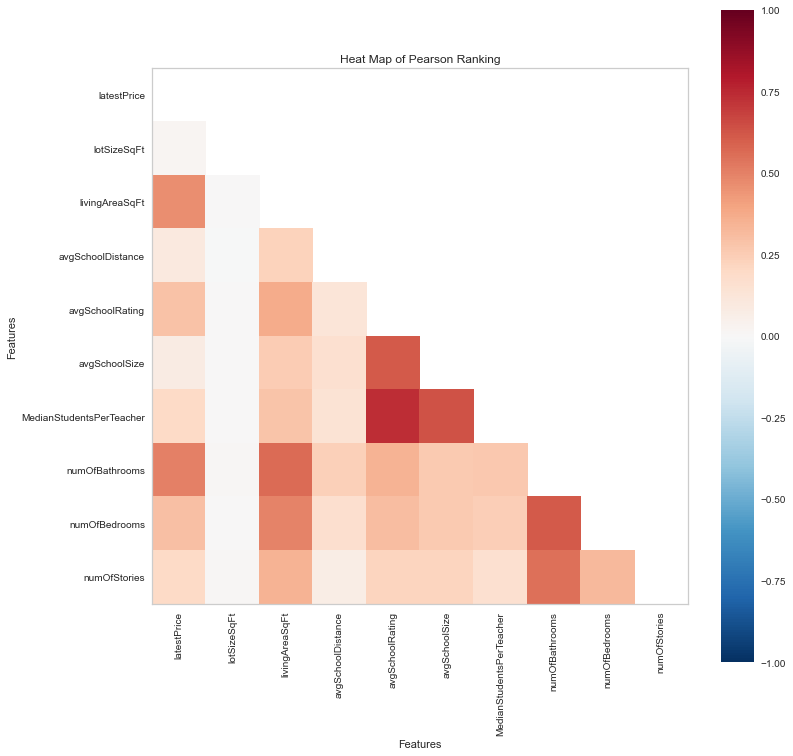

In [33]:
#Pearson Ranking
#set up the figure size

#New features
num_features = ['latestPrice','lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories']
plt.rcParams['figure.figsize'] = (12, 12)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_austin_housing[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.title("Heat Map of Pearson Ranking")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

<AxesSubplot:title={'center':'All Feature Correlation Heat Map of Austin Housing Market'}>

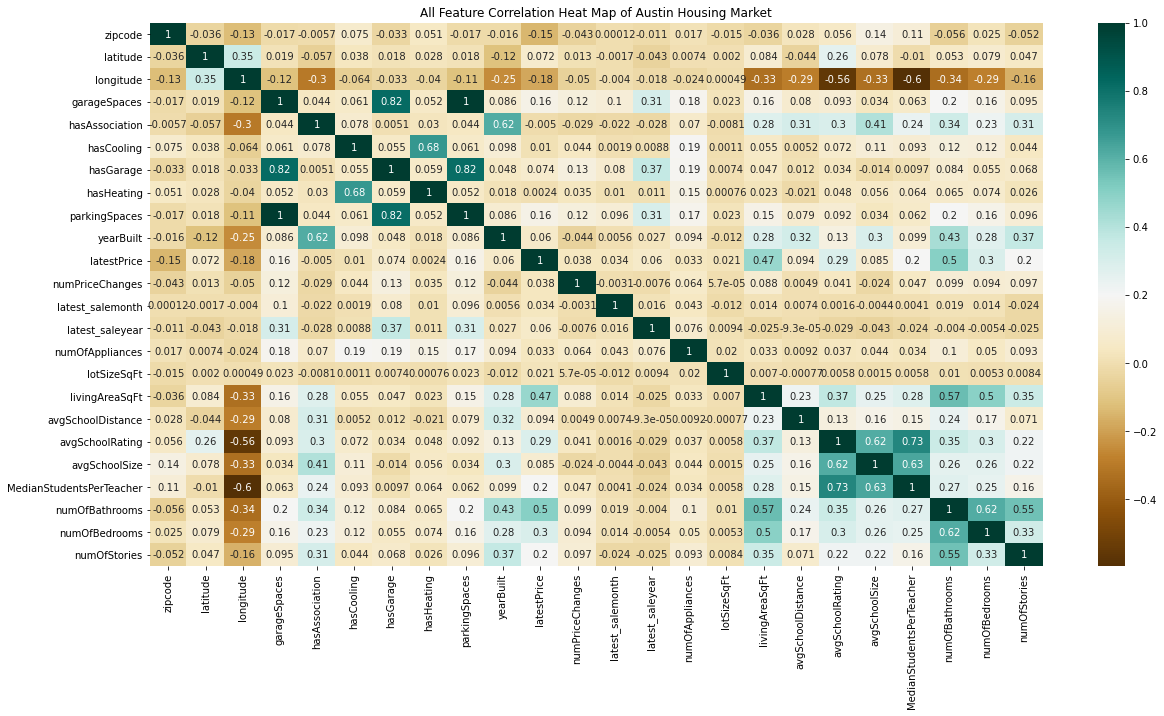

In [6]:
#Run full correlation on the data set using heat map
plt.figure(figsize=(20,10))
c= df_austin_housing.corr()
plt.title("All Feature Correlation Heat Map of Austin Housing Market")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(c,cmap="BrBG",annot=True)

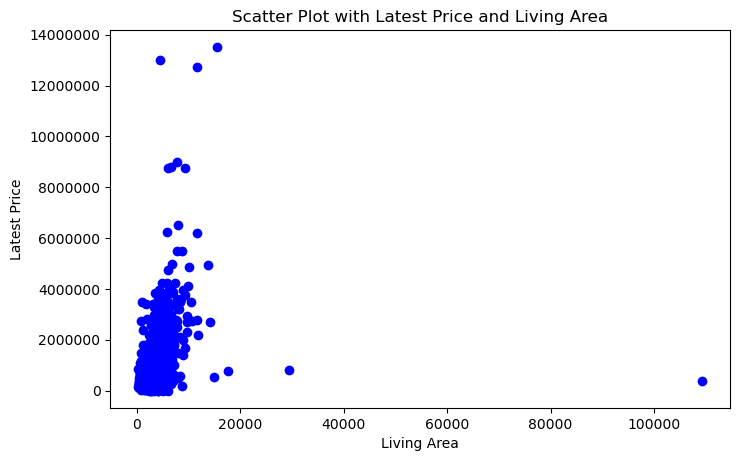

In [17]:
# Scatterplot - To check data
x = df_austin_housing['livingAreaSqFt']
y = df_austin_housing['latestPrice']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Latest Price and Living Area')
plt.xlabel('Living Area')
plt.ylabel('Latest Price')
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Note: There appears to be a outlier. A home with over 100,000 living area. Going to remove it.

In [14]:
#Copy the data in case need to go back
df_austin_housing_copy_2 = df_austin_housing.copy(deep=True)

In [15]:
#Starting size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (15171, 38)


In [18]:
#Keep data with homes under 20000 living square foot
df_austin_housing = df_austin_housing[df_austin_housing['livingAreaSqFt'] < 4000] 

In [19]:
#Ending Size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (14362, 38)


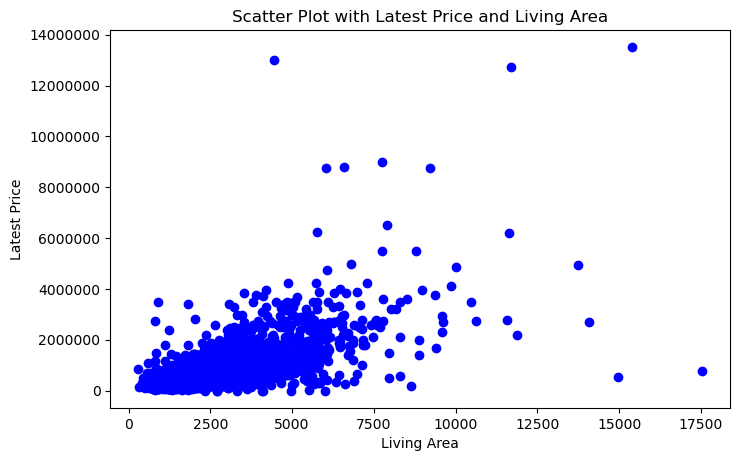

In [22]:
# Scatterplot - To check data
x = df_austin_housing['livingAreaSqFt']
y = df_austin_housing['latestPrice']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Latest Price and Living Area')
plt.xlabel('Living Area')
plt.ylabel('Latest Price')
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [23]:
df_sample=df_austin_housing[df_austin_housing['livingAreaSqFt'] > 10000]

In [24]:
df_sample

,city,streetAddress,zipcode,latitude,longitude,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfAppliances,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
375,austin,14800 Flat Top Ranch Rd,78732,30.368996,-97.912720,6,True,True,True,True,...,3,116740.8,13731.0,2.733333,8.333333,1476,17,10.0,5,2
613,austin,9113 Camelback Dr,78733,30.331038,-97.855659,3,True,True,True,True,...,1,43560.0,10611.0,3.500000,8.000000,1373,14,10.0,6,2
1360,austin,14300 Flat Top Ranch Rd,78732,30.376249,-97.913002,0,True,True,False,True,...,3,257004.0,11622.0,2.766667,8.333333,1476,17,8.0,5,2
1399,austin,1101 N Weston Ln,78733,30.323383,-97.842186,0,True,False,False,False,...,0,466963.2,11683.0,2.966667,9.333333,1360,14,0.0,0,2
2316,austin,12400 Cedar St,78732,30.392859,-97.877609,5,False,True,True,True,...,0,710899.2,15394.0,2.200000,8.333333,1476,17,13.0,6,1
2547,austin,305 Marly Way,78733,30.324699,-97.861267,4,True,True,True,True,...,8,82328.4,11581.0,3.266667,8.000000,1373,14,10.0,7,3
4753,austin,7702 Sandia Loop,78735,30.277086,-97.860168,5,True,True,True,True,...,3,199940.4,11871.0,4.533333,5.666667,1332,16,9.0,6,3
4882,austin,4429 Mirador Dr,78735,30.263178,-97.866661,7,True,True,True,True,...,2,454330.8,10011.0,4.666667,5.666667,1332,16,6.0,5,2
5328,austin,3509 Lost Creek Blvd,78735,30.272158,-97.856033,7,True,True,True,True,...,5,138956.4,14091.0,4.300000,5.666667,1332,16,10.0,6,3
10588,austin,3303 Garden Villa Ln,78704,30.234896,-97.770287,2,False,False,True,True,...,0,17424.0,17536.0,1.166667,3.666667,861,12,0.0,6,2


Note: Address with zero appliance are being dropped as they might just be lots or none homes. I checked a few of the address on Google Maps and some where just lots or where not homes at all but place of business.

In [21]:
#Copy the data in case need to go back
df_austin_housing_copy_3 = df_austin_housing.copy(deep=True)

In [41]:
#use if needed
#Copy the data in case need to go back
#df_austin_housing = df_austin_housing_copy_3.copy(deep=True)

In [22]:
#Keep homes with zero appliances
df_austin_housing = df_austin_housing[df_austin_housing['numOfAppliances'] != 0]

In [23]:
#Keep homes under 10,000 sqft living
df_austin_housing = df_austin_housing[df_austin_housing['livingAreaSqFt'] < 10000] 

In [24]:
#Ending Size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (14087, 38)


In [25]:
#Keep homes under $6MM
df_austin_housing = df_austin_housing[df_austin_housing['latestPrice'] < 1000000]

In [26]:
#Ending Size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (13199, 38)


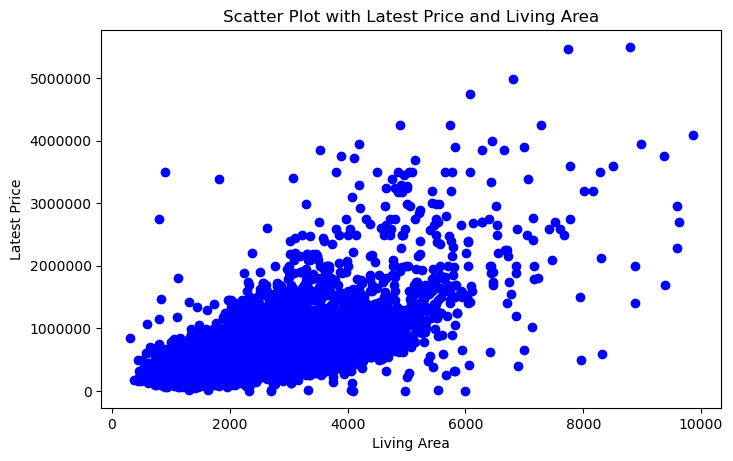

In [50]:
# Scatterplot - To check data
x = df_austin_housing['livingAreaSqFt']
y = df_austin_housing['latestPrice']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Latest Price and Living Area')
plt.xlabel('Living Area')
plt.ylabel('Latest Price')
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

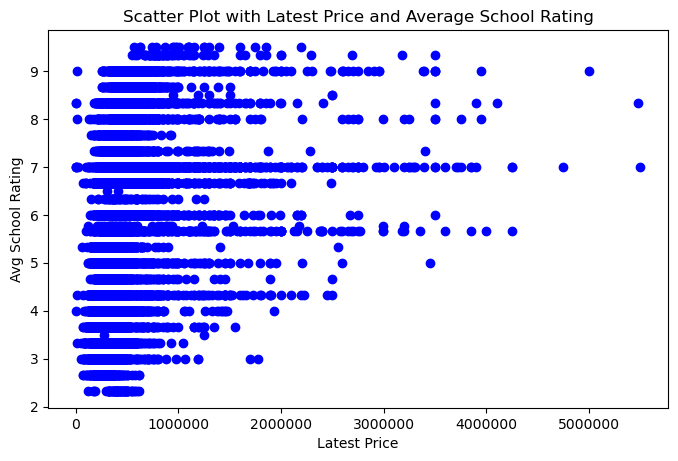

In [51]:
# Scatterplot - To check data with different types
x = df_austin_housing['latestPrice']
y = df_austin_housing['avgSchoolRating']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Latest Price and Average School Rating')
plt.xlabel('Latest Price')
plt.ylabel('Avg School Rating')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

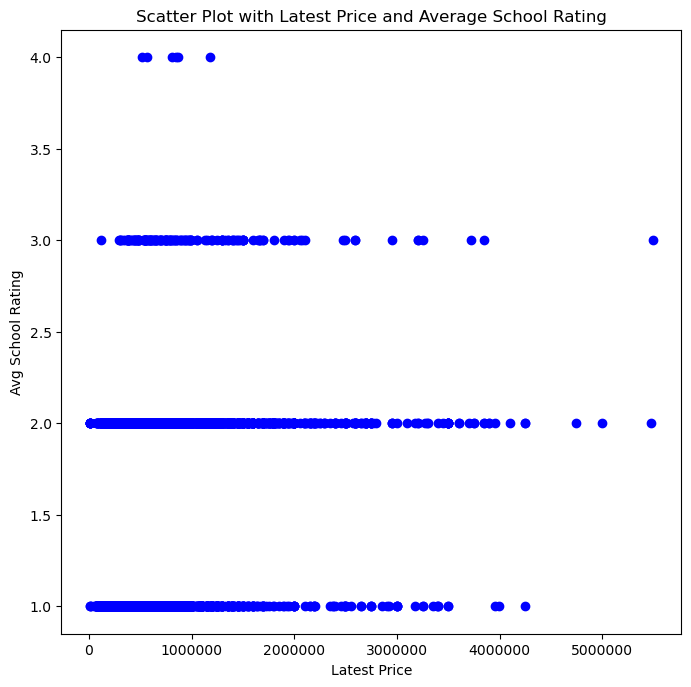

In [52]:
# Scatterplot - To check correlation
x = df_austin_housing['latestPrice']
y = df_austin_housing['numOfStories']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Latest Price and Average School Rating')
plt.xlabel('Latest Price')
plt.ylabel('Avg School Rating')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

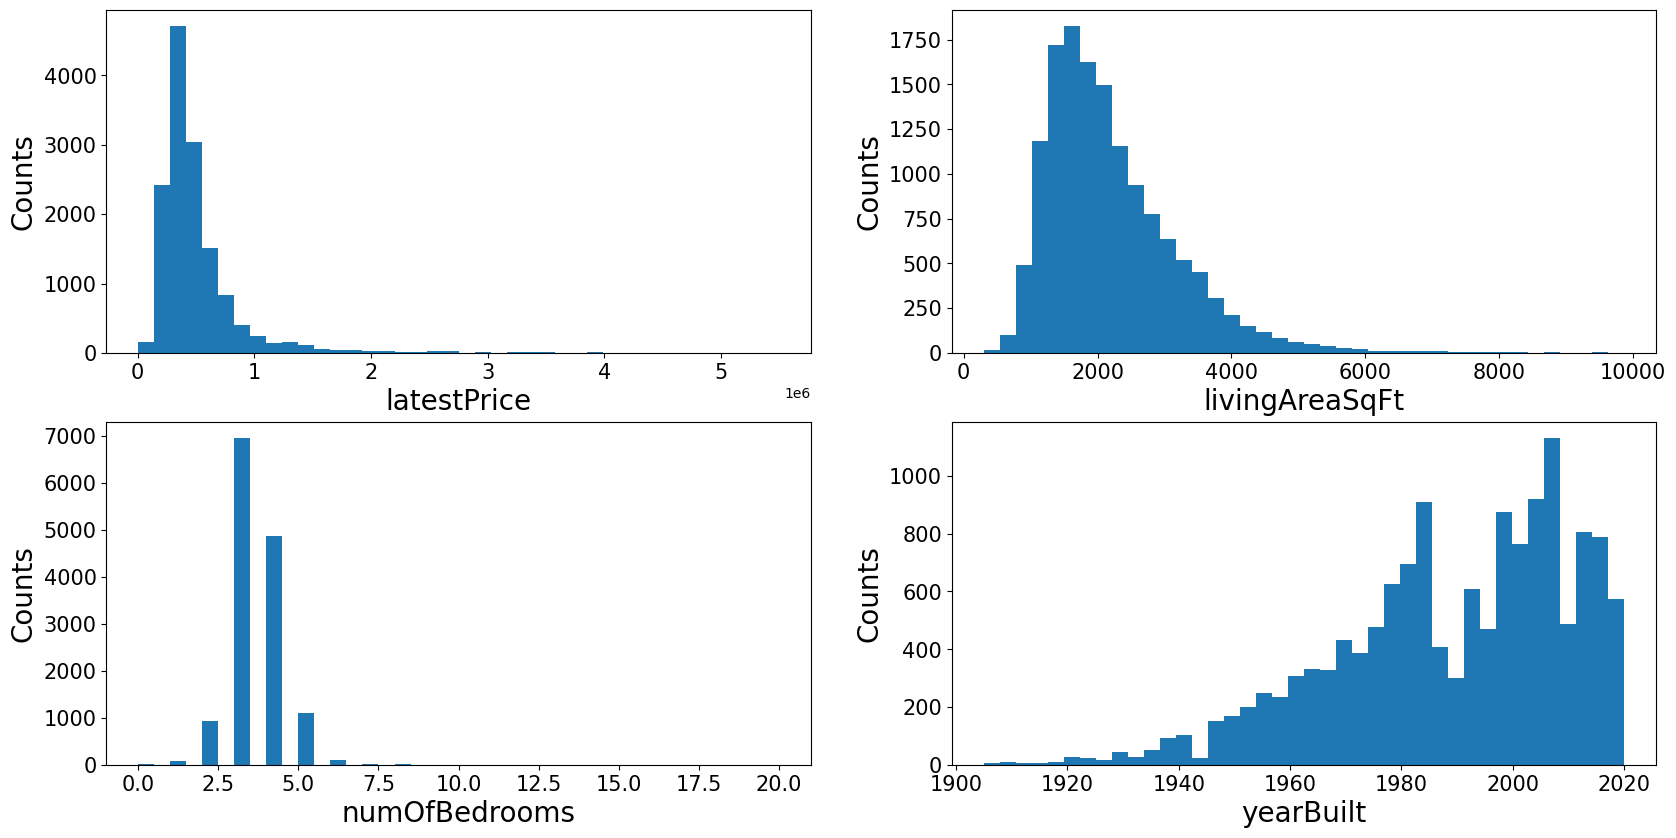

In [53]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['latestPrice', 'livingAreaSqFt', 'numOfBedrooms', 'yearBuilt']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_austin_housing[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

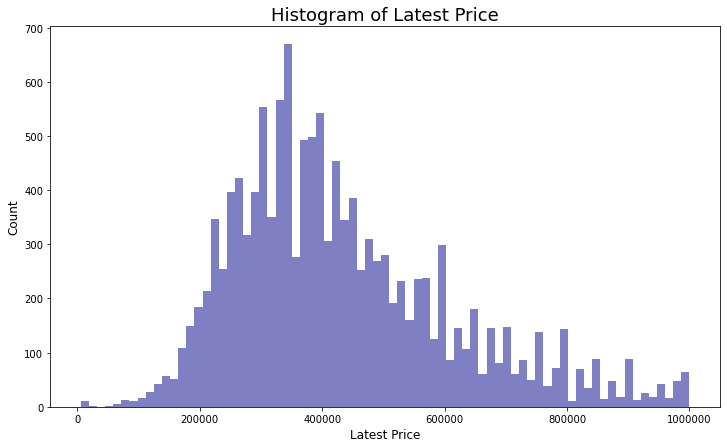

In [34]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.hist(df_austin_housing['latestPrice'].dropna(), bins=75, facecolor='darkblue', alpha=0.5)
#Labels
plt.title('Histogram of Latest Price', fontsize = 18)
plt.xlabel('Latest Price', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.ticklabel_format(axis='x', style='plain') 
plt.show()

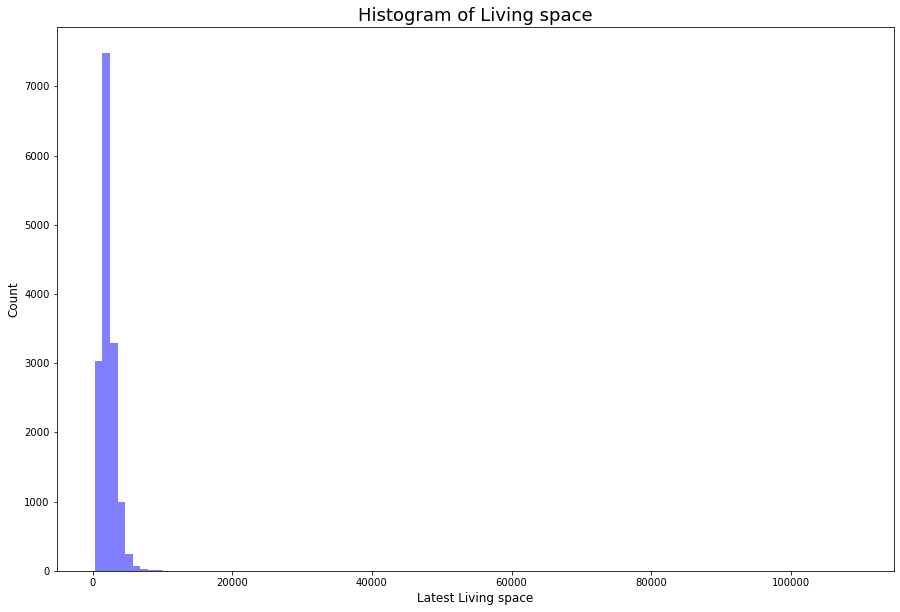

In [16]:
#Living spaces
plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(df_austin_housing['livingAreaSqFt'], bins=100, facecolor='blue', alpha=0.5)
#Labels
plt.title('Histogram of Living space', fontsize=18)
plt.xlabel('Latest Living space',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ticklabel_format(axis='x', style='plain') 
plt.show()

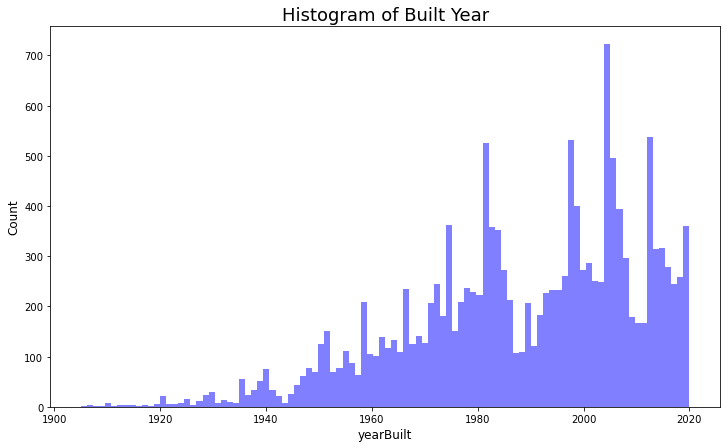

In [9]:
#Build Year
plt.rcParams['figure.figsize'] = (12, 7)
plt.hist(df_austin_housing['yearBuilt'], bins=100, facecolor='blue', alpha=0.5)
#Labels
plt.title('Histogram of Built Year', fontsize=18)
plt.xlabel('yearBuilt',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.ticklabel_format(axis='x', style='plain') 
plt.show()

In [17]:
#View the columns
df_austin_housing.columns

Index(['city', 'streetAddress', 'zipcode', 'latitude', 'longitude',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfAppliances',
       'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [18]:
#View top 5 rows
df_austin_housing.head()

,city,streetAddress,zipcode,latitude,longitude,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfAppliances,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,2,True,True,True,True,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",5,6011.0,2601.0,1.266667,2.666667,1063,14,3.0,4,2
1,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,2,True,True,True,True,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,1,6185.0,1768.0,1.400000,2.666667,1063,14,2.0,4,1
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,0,True,True,False,True,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,4,7840.0,1478.0,1.200000,3.000000,1108,14,2.0,3,1
5,pflugerville,14908 Spring Hill Ln,78660,30.437775,-97.656181,2,True,True,True,True,Single Family,2,2020,309045.0,2,2020-08-05,8,2020,Broker Provided,3,5161.0,1446.0,1.066667,4.000000,1223,14,2.0,3,1
6,pflugerville,14009 Cantata Ln,78660,30.414684,-97.643394,0,True,False,False,False,Single Family,0,2016,315000.0,2,2020-06-11,6,2020,Broker Provided,3,12196.8,2432.0,1.233333,3.666667,1051,12,3.0,4,2


In [21]:
#Copy the data in case need to go back
df_austin_housing_copy_4 = df_austin_housing.copy(deep=True)

In [29]:
#Revert Use if needed
#df_austin_housing = df_austin_housing_copy_4.copy(deep=True)

In [33]:
#Review top 20 rows
df_austin_housing.head(20)

,city,streetAddress,zipcode,latitude,longitude,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfAppliances,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,2,1,True,True,True,...,5,6011.0,2601.0,1.266667,2.666667,1063,14,3.0,4,2
1,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,2,1,True,True,True,...,1,6185.0,1768.0,1.400000,2.666667,1063,14,2.0,4,1
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,0,1,True,False,True,...,4,7840.0,1478.0,1.200000,3.000000,1108,14,2.0,3,1
5,pflugerville,14908 Spring Hill Ln,78660,30.437775,-97.656181,2,1,True,True,True,...,3,5161.0,1446.0,1.066667,4.000000,1223,14,2.0,3,1
6,pflugerville,14009 Cantata Ln,78660,30.414684,-97.643394,0,1,False,False,False,...,3,12196.8,2432.0,1.233333,3.666667,1051,12,3.0,4,2
7,pflugerville,15009 Drusillas Dr,78660,30.439404,-97.658035,0,1,True,False,True,...,3,5140.0,1422.0,1.166667,4.000000,1223,14,3.0,3,2
8,pflugerville,1104 Traci Michelle Dr,78660,30.439096,-97.657959,0,1,True,False,True,...,2,3811.0,1870.0,1.166667,4.000000,1223,14,2.0,3,2
9,del valle,6808 Plains Crest Dr,78617,30.160702,-97.638123,2,1,True,True,True,...,3,5183.0,1422.0,1.200000,3.000000,1615,14,3.0,3,2
10,pflugerville,1100 Oblique Dr,78660,30.414934,-97.643288,2,1,True,True,True,...,3,5401.0,1580.0,1.200000,3.666667,1051,12,2.0,3,1
11,del valle,12612 Stoney Ridge Bnd,78617,30.159338,-97.633354,0,1,True,False,True,...,4,4965.0,2281.0,1.200000,3.000000,1615,14,3.0,3,2


In [31]:
#replace True and False with 1 and zero
df_austin_housing['hasAssociation'] = df_austin_housing['hasAssociation'] .replace({True: 1, False: 0})

In [37]:
#change all booleans to ints for modeling
df_austin_housing['hasAssociation'] = df_austin_housing['hasAssociation'] .replace({True: 1, False: 0})
df_austin_housing['hasCooling'] = df_austin_housing['hasCooling'] .replace({True: 1, False: 0})
df_austin_housing['hasGarage'] = df_austin_housing['hasGarage'] .replace({True: 1, False: 0})
df_austin_housing['hasHeating'] = df_austin_housing['hasHeating'] .replace({True: 1, False: 0})

In [38]:
#Review top 5
df_austin_housing.head()

,city,streetAddress,zipcode,latitude,longitude,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfAppliances,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,2,1,1,1,1,...,5,6011.0,2601.0,1.266667,2.666667,1063,14,3.0,4,2
1,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,2,1,1,1,1,...,1,6185.0,1768.0,1.400000,2.666667,1063,14,2.0,4,1
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,0,1,1,0,1,...,4,7840.0,1478.0,1.200000,3.000000,1108,14,2.0,3,1
5,pflugerville,14908 Spring Hill Ln,78660,30.437775,-97.656181,2,1,1,1,1,...,3,5161.0,1446.0,1.066667,4.000000,1223,14,2.0,3,1
6,pflugerville,14009 Cantata Ln,78660,30.414684,-97.643394,0,1,0,0,0,...,3,12196.8,2432.0,1.233333,3.666667,1051,12,3.0,4,2


In [34]:
#Check feature values counts
df_austin_housing['hasAssociation'].value_counts()

1    7582
0    6499
Name: hasAssociation, dtype: int64

In [2]:
#Additional library
import csv 

In [28]:
#Write file down to csv
df_austin_housing.to_csv('file_name.csv', index=False)

In [25]:
#Going to use pycaret to see if it works better.
from pycaret.regression import *
ahm_reg100 = setup(data = df_austin_housing, target = 'latestPrice', session_id=100)

,Description,Value
0,session_id,100
1,Target,latestPrice
2,Original Data,"(14081, 19)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9856, 107)"


In [39]:
#View the information on the data
df_austin_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14081 entries, 0 to 15170
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city                      14081 non-null  object 
 1   streetAddress             14081 non-null  object 
 2   zipcode                   14081 non-null  int64  
 3   latitude                  14081 non-null  float64
 4   longitude                 14081 non-null  float64
 5   garageSpaces              14081 non-null  int64  
 6   hasAssociation            14081 non-null  int64  
 7   hasCooling                14081 non-null  int64  
 8   hasGarage                 14081 non-null  int64  
 9   hasHeating                14081 non-null  int64  
 10  homeType                  14081 non-null  object 
 11  parkingSpaces             14081 non-null  int64  
 12  yearBuilt                 14081 non-null  int64  
 13  latestPrice               14081 non-null  float64
 14  numPri

In [29]:
#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics


Divide the data into “attributes” and “labels” 
X variable contains all the attributes/features 
y variable contains labels.

In [17]:
#List all the columns
df_austin_housing.columns

Index(['city', 'streetAddress', 'zipcode', 'latitude', 'longitude',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfAppliances',
       'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [48]:
#Spliting the data between X and y
X = df_austin_housing[['garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'parkingSpaces', 'yearBuilt',
       'numPriceChanges', 'latest_salemonth',
       'latest_saleyear', 'numOfAppliances',
       'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories']]

y = df_austin_housing['latestPrice']

In [49]:
#Split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
#Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -73898287.93483569
Coefficients: 
 [-7.08054514e+04 -1.87975176e+05 -7.11034956e+04  3.67972518e+03
  8.28219062e+04  6.85038916e+04 -1.16534439e+03 -1.13378684e+04
  3.01807614e+03  3.78574456e+04  3.79245164e+03  3.98815289e-04
  2.96231461e+02 -1.68929002e+04  2.00115731e+04 -9.18253357e+01
 -2.74147348e+03  8.44440854e+04 -1.02146825e+05 -5.41658946e+04]


In [53]:
#Check coeffient for the features
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
garageSpaces,-70805.451385
hasAssociation,-187975.176286
hasCooling,-71103.495617
hasGarage,3679.725181
hasHeating,82821.906238
parkingSpaces,68503.891550
yearBuilt,-1165.344395
numPriceChanges,-11337.868385
latest_salemonth,3018.076143
latest_saleyear,37857.445638


In [54]:
#Copy data
y_pred = regressor.predict(X_test)

In [55]:
#Review the data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

In [56]:
df1

,Actual,Predicted
163,359900.0,3.029253e+05
6245,350000.0,7.006673e+05
9952,510000.0,6.313934e+05
35,219990.0,3.530451e+05
5591,250000.0,2.087415e+05
1880,344000.0,5.036782e+05
3620,339400.0,2.876172e+05
11166,350000.0,5.140405e+05
14289,2059000.0,1.282155e+06
3771,465000.0,6.952646e+05


### New Test

In [27]:
#Change the features for new test
X = df_austin_housing[['garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating','lotSizeSqFt', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories']]

y = df_austin_housing['latestPrice']

In [30]:
#Split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
garageSpaces,9173.092422
hasAssociation,-62963.242362
hasCooling,-71834.445269
hasGarage,-1014.231142
hasHeating,75354.416746
lotSizeSqFt,0.001495
numOfBathrooms,79167.011894
numOfBedrooms,17834.193803
numOfStories,-5919.438422


In [33]:
y_pred = regressor.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

In [35]:
df1

,Actual,Predicted
3961,295000.0,410697.541835
6534,188750.0,490997.037202
2080,239900.0,530575.049428
10346,240000.0,453927.366837
6565,325000.0,428029.755647
12054,194000.0,650167.068111
3894,339900.0,400417.704365
7868,499000.0,417753.416219
13977,450000.0,446378.237470
6545,324900.0,337453.290009


In [36]:
print(regressor.score(X_test, y_test))

0.18351833181527444


In [67]:
#Copy the data in case need to go back
df_austin_housing_copy_5 = df_austin_housing.copy(deep=True)

In [153]:
#Adding more stuff
df_austin_housing = df_austin_housing_copy_1.copy(deep=True)

In [114]:
df_austin_housing = df_austin_housing_copy_5.copy(deep=True)

In [154]:
#starting Size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (15171, 47)


In [155]:
#Keep homes under $1MM
df_austin_housing = df_austin_housing[df_austin_housing['latestPrice'] < 1000000]

In [156]:
#Middle Size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (14218, 47)


In [157]:
#Keep homes under 4,000 sqft living
df_austin_housing = df_austin_housing[df_austin_housing['livingAreaSqFt'] < 4000] 

In [158]:
#Ending Size
print("The dimension of the table is: ", df_austin_housing.shape)

The dimension of the table is:  (13826, 47)


In [159]:
#List all the columns
df_austin_housing.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [160]:
df_austin_housing.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [161]:
#change all booleans to ints for modeling
df_austin_housing['hasAssociation'] = df_austin_housing['hasAssociation'] .replace({True: 1, False: 0})
df_austin_housing['hasCooling'] = df_austin_housing['hasCooling'] .replace({True: 1, False: 0})
df_austin_housing['hasGarage'] = df_austin_housing['hasGarage'] .replace({True: 1, False: 0})
df_austin_housing['hasHeating'] = df_austin_housing['hasHeating'] .replace({True: 1, False: 0})

In [170]:
#Split between X and y for prediction model
X = df_austin_housing[['zipcode','latest_saleyear','garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'numOfBathrooms','livingAreaSqFt','avgSchoolRating','MedianStudentsPerTeacher',
       'numOfBedrooms', 'numOfStories','avgSchoolDistance','parkingSpaces','yearBuilt','numPriceChanges',
                      'hasSpa', 'hasView','numOfParkingFeatures','numOfPatioAndPorchFeatures', 
                       'numOfSecurityFeatures','numOfWaterfrontFeatures', 'numOfWindowFeatures',
                       'numOfCommunityFeatures','longitude']]

y = df_austin_housing['latestPrice']

In [171]:
#Split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [172]:
#Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
zipcode,-1430.105959
latest_saleyear,15436.546546
garageSpaces,717.488876
hasAssociation,-82054.004851
hasCooling,-14497.354255
hasGarage,29358.414905
hasHeating,35681.923661
numOfBathrooms,33599.412284
livingAreaSqFt,139.726027
avgSchoolRating,23346.234591


In [174]:
y_pred = regressor.predict(X_test)

In [175]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

In [176]:
df1.head(25)

,Actual,Predicted
12940,444000.0,359725.481090
3189,269000.0,228056.146661
13116,280000.0,290907.127393
2303,399900.0,592336.220007
3316,379900.0,403137.275658
9480,620000.0,329105.085268
3376,338000.0,489048.604227
883,185000.0,406834.137081
2935,289000.0,344691.806436
5020,264990.0,330889.087117


In [177]:
print(regressor.score(X_test, y_test))

0.4874495703827234


# Regession Model

In [3]:
# expand view of data
pd.set_option('display.max_columns', None)

In [4]:
# load data into a dataframe
current_file = "austinHousingData.csv"

df_austin_housing = pd.read_csv(current_file)

In [5]:
#Elements to be dropped
df_austin_housing=df_austin_housing.drop(['zpid', 'description', 'propertyTaxRate',
                                         'numOfAccessibilityFeatures','numOfParkingFeatures',
                                         'homeImage','hasView','hasSpa','city', 'streetAddress',
                                         'latest_saledate','latestPriceSource'], axis=1)

In [5]:
#Print the columns names after drop
print("Column names: ", df_austin_housing.columns)

Column names:  Index(['zipcode', 'latitude', 'longitude', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'homeType', 'parkingSpaces',
       'yearBuilt', 'latestPrice', 'numPriceChanges', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAppliances',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')


In [6]:
df_austin_housing['homeType'].value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [6]:
# generate binary values for hometype column
df_austin_housing = pd.get_dummies(df_austin_housing, columns=['homeType'], prefix=['homeType'] )

In [7]:
# change all booleans to ints for modeling
df_austin_housing['hasAssociation'] = df_austin_housing['hasAssociation'] .replace({True: 1, False: 0})
df_austin_housing['hasCooling'] = df_austin_housing['hasCooling'] .replace({True: 1, False: 0})
df_austin_housing['hasGarage'] = df_austin_housing['hasGarage'] .replace({True: 1, False: 0})
df_austin_housing['hasHeating'] = df_austin_housing['hasHeating'] .replace({True: 1, False: 0})
df_austin_housing['hasAssociation'] = df_austin_housing['hasAssociation'] .replace({True: 1, False: 0})

In [8]:
df_austin_housing.shape

(15171, 44)

In [9]:
print(df_austin_housing.describe())

            zipcode      latitude     longitude  garageSpaces  hasAssociation  \
count  15171.000000  15171.000000  15171.000000  15171.000000    15171.000000   
mean   78735.932964     30.291596    -97.778532      1.229187        0.527783   
std       18.893475      0.096973      0.084715      1.352117        0.499244   
min    78617.000000     30.085030    -98.022057      0.000000        0.000000   
25%    78727.000000     30.203313    -97.838009      0.000000        0.000000   
50%    78739.000000     30.284416    -97.769539      1.000000        1.000000   
75%    78749.000000     30.366585    -97.717903      2.000000        1.000000   
max    78759.000000     30.517323    -97.569504     22.000000        1.000000   

         hasCooling     hasGarage    hasHeating  parkingSpaces     yearBuilt  \
count  15171.000000  15171.000000  15171.000000   15171.000000  15171.000000   
mean       0.981939      0.550129      0.990179       1.224507   1988.554743   
std        0.133176      0.497

In [11]:
# copy the data in case need to go back
df_austin_housing_copy_n3 = df_austin_housing.copy(deep=True)

In [ ]:
# use if needed
#Copy the data in case need to go back
#df_austin_housing = df_austin_housing_copy_n3.copy(deep=True)

In [12]:
# check size
df_austin_housing.shape

(15171, 44)

In [9]:
# keep homes with zero appliances
df_austin_housing = df_austin_housing[df_austin_housing['numOfAppliances'] != 0]

In [10]:
# check size
df_austin_housing.shape

(14095, 44)

In [11]:
# keep data with homes under 4000 living square foot
df_austin_housing = df_austin_housing[df_austin_housing['livingAreaSqFt'] <= 4000] 
#Changed from 3000 to 4000

In [12]:
# check size
df_austin_housing.shape

(13338, 44)

In [13]:
# keep homes under $1MM Home above 1MM are luxury homes
df_austin_housing = df_austin_housing[df_austin_housing['latestPrice'] < 1000000]

In [14]:
# check size
df_austin_housing.shape

(12834, 44)

In [19]:
# pull columns names to split train and test
df_austin_housing.columns

Index(['zipcode', 'latitude', 'longitude', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'parkingSpaces', 'yearBuilt',
       'latestPrice', 'numPriceChanges', 'latest_salemonth', 'latest_saleyear',
       'numOfPhotos', 'numOfAppliances', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'homeType_Apartment',
       'homeType_Condo', 'homeType_Mobile / Manufactured',
       'homeType_MultiFamily', 'homeType_Multiple Occupancy', 'homeType_Other',
       'homeType_Residential', 'homeType_Single Family', 'homeType_Townhouse',
       'homeType_Vacant Land'],
      dtype='object

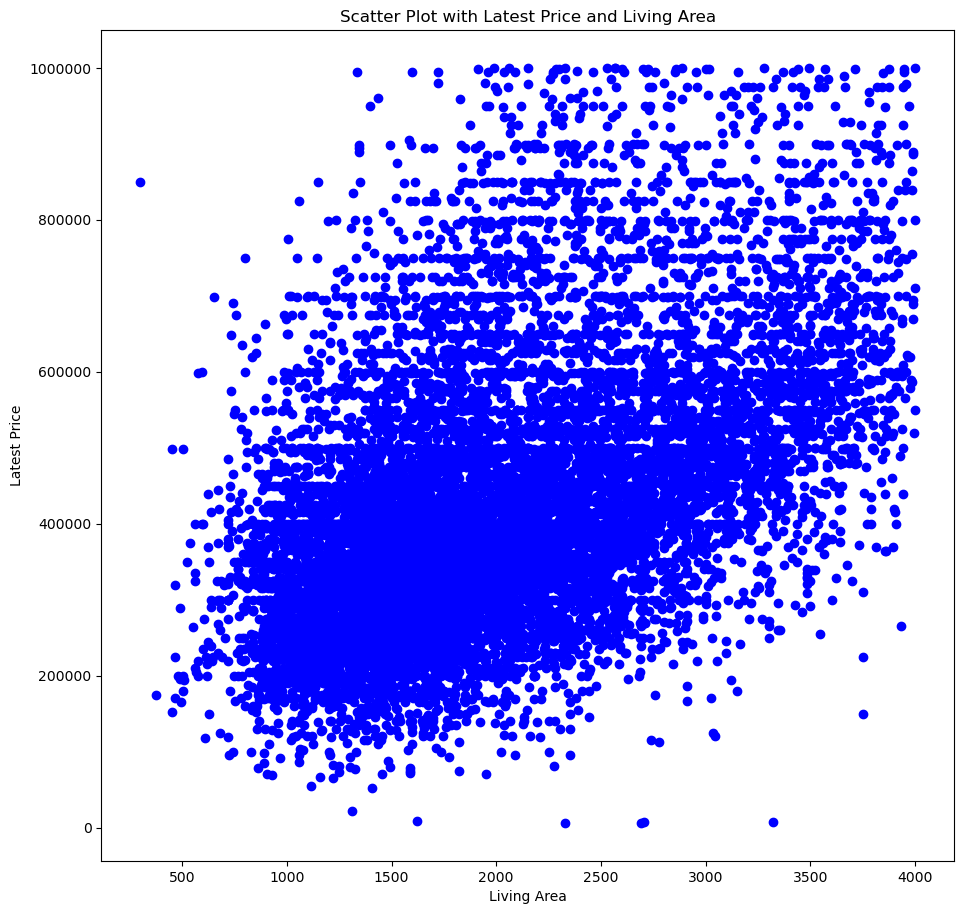

In [28]:
# Scatterplot - To check data
l = df_austin_housing['livingAreaSqFt']
p = df_austin_housing['latestPrice']

# Plot
plt.scatter(living,price,color='blue')
plt.rcParams.update({'figure.figsize':(11,11), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Latest Price and Living Area')
plt.xlabel('Living Area')
plt.ylabel('Latest Price')
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

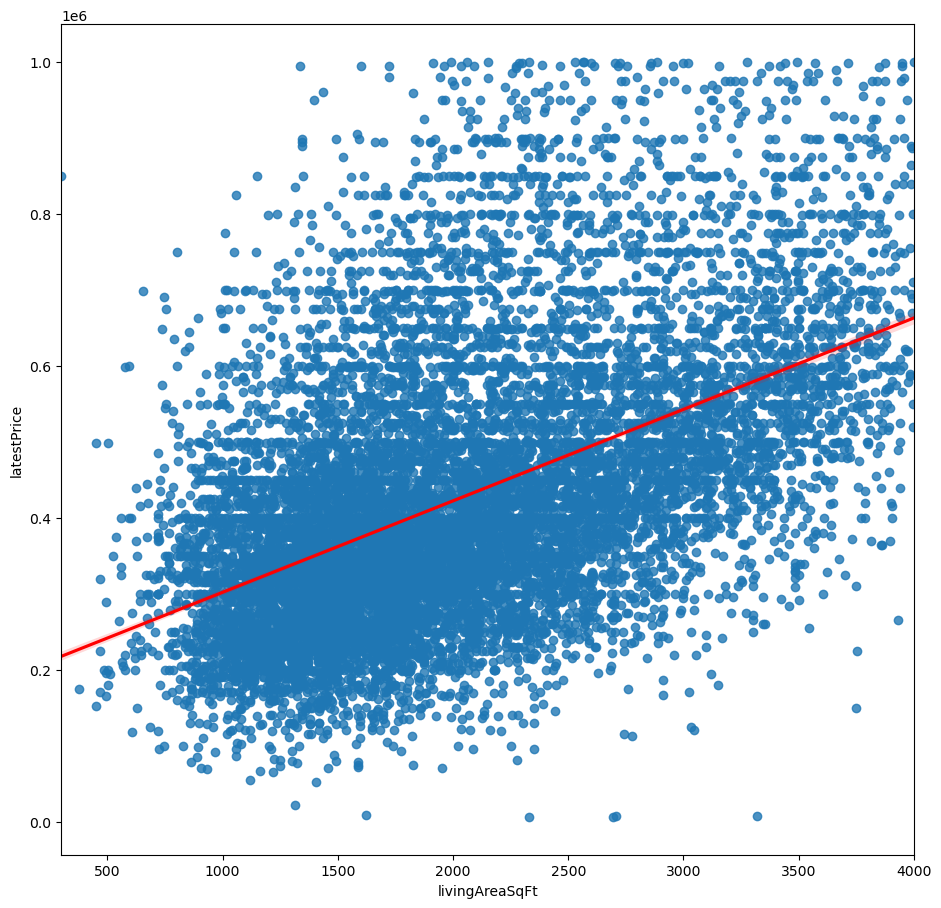

In [25]:
#sns.regplot(x, y)

#house = sns.load_dataset('df_austin_housing')
ax = sns.regplot(x='livingAreaSqFt', y='latestPrice', data=df_austin_housing,
                 line_kws={"color": "red"})

plt.show()

In [20]:
# split out X and y
X = df_austin_housing[['zipcode', 'latitude', 'longitude', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'parkingSpaces', 'yearBuilt',
       'numPriceChanges', 'latest_salemonth', 'latest_saleyear',
       'numOfPhotos', 'numOfAppliances', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'homeType_Apartment',
       'homeType_Condo', 'homeType_Mobile / Manufactured',
       'homeType_MultiFamily', 'homeType_Multiple Occupancy', 'homeType_Other',
       'homeType_Residential', 'homeType_Single Family', 'homeType_Townhouse',
       'homeType_Vacant Land']]

y = df_austin_housing['latestPrice']

In [21]:
# split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# train the model using linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff

,Coefficient
zipcode,-1204.097186
latitude,-235033.457123
longitude,289294.716617
garageSpaces,-23524.744482
hasAssociation,-80674.262407
hasCooling,-584.217334
hasGarage,14890.361611
hasHeating,13391.042551
parkingSpaces,20171.122529
yearBuilt,-1288.927904


In [52]:
y_pred = regressor.predict(X_test)

In [26]:
print(regressor.score(X_test, y_test))

0.5291293289053352


In [27]:
# calculate rmse and r2
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [28]:
# print rmse
rmse

116246.51265491471

In [29]:
r2

0.5291293289053352

In [30]:
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,y_pred)

13513251704.429247

In [31]:
mean_absolute_error(y_test,y_pred)

86173.34851286063

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head(25)

,Actual,Predicted
14489,649900.0,575182.369212
2779,635000.0,427667.851998
2079,205000.0,258566.693558
10943,349900.0,333736.831067
10993,260000.0,275567.065780
4096,260000.0,225649.647245
12412,329900.0,400139.938471
4433,179500.0,289047.094130
12427,375000.0,407393.746028
6175,975000.0,741004.583908


In [37]:
print(('R-Squared :'), regressor.score(X_test, y_test))

R-Squared : 0.5221370512831762


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


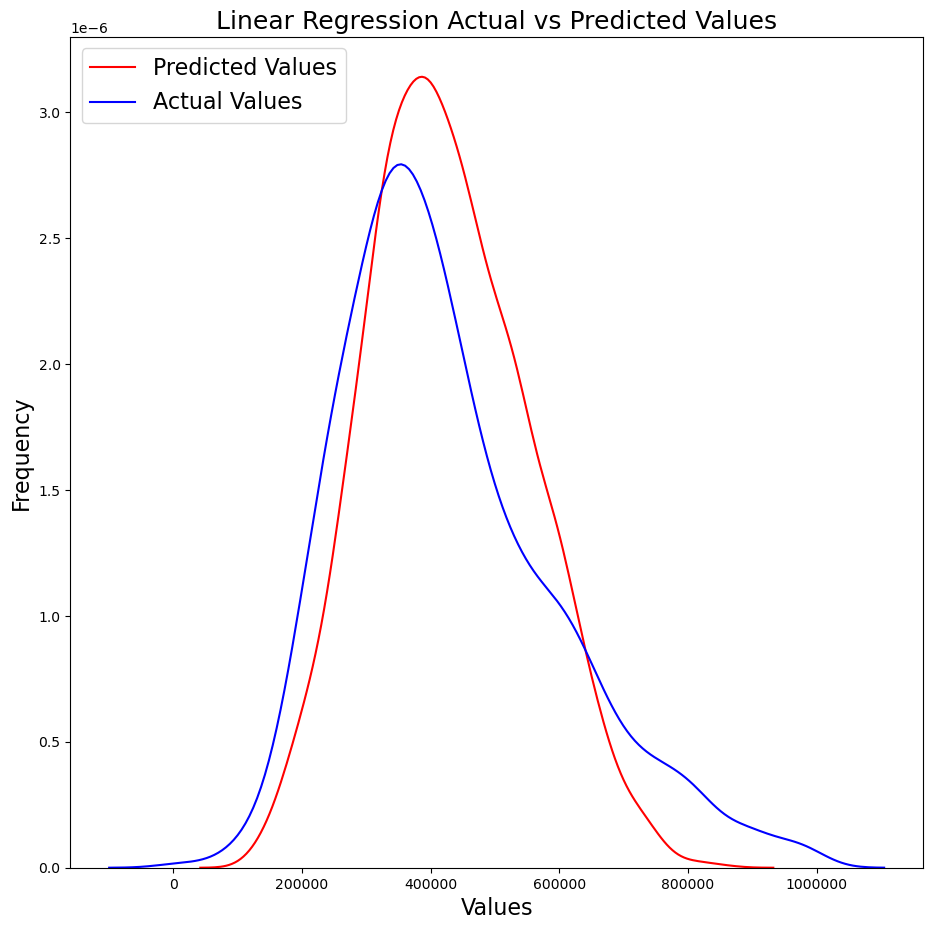

In [41]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Linear Regression Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')


plt.savefig('ap.png')

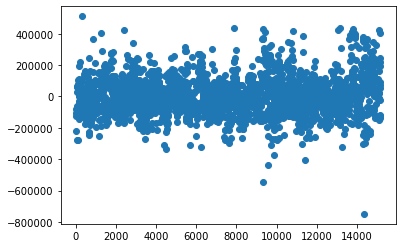

In [32]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

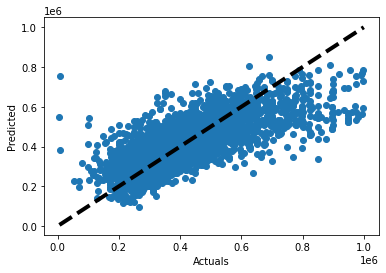

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()

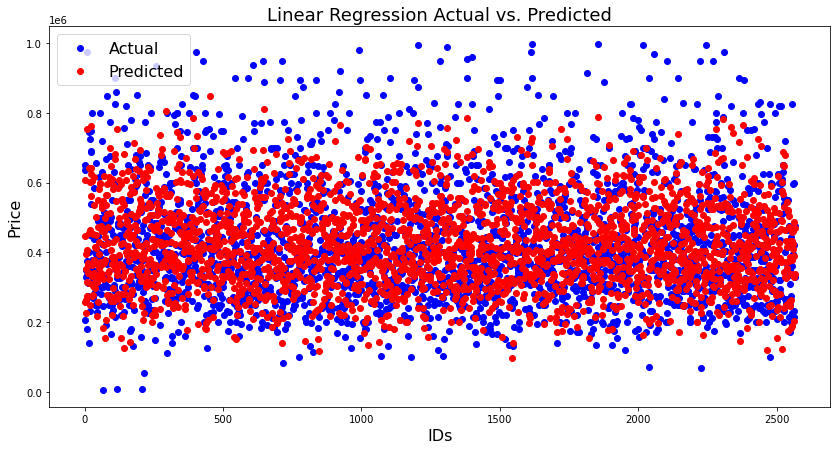

In [55]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Linear Regression Actual vs. Predicted', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# Decision Tree Model

In [22]:
# using decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
y_pred = dtr.predict(X_test)

In [24]:
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df2

,Real Values,Predicted Values
14489,649900.0,815000.0
2779,635000.0,579000.0
2079,205000.0,221900.0
10943,349900.0,348000.0
10993,260000.0,240000.0
...,...,...
14429,600000.0,745000.0
5048,214900.0,299899.0
1100,421161.0,399900.0
9708,475000.0,365000.0


In [25]:
df2.head(25)

,Real Values,Predicted Values
14489,649900.0,815000.0
2779,635000.0,579000.0
2079,205000.0,221900.0
10943,349900.0,348000.0
10993,260000.0,240000.0
4096,260000.0,278000.0
12412,329900.0,359000.0
4433,179500.0,320000.0
12427,375000.0,420000.0
6175,975000.0,505000.0


In [26]:
X_test.shape

(2567, 43)

In [27]:
y_test.shape

(2567,)

In [30]:
y_pred.shape

(2567,)

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


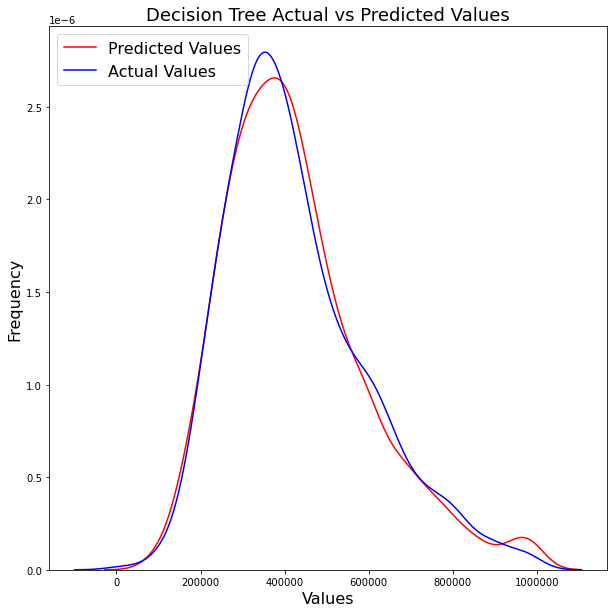

In [36]:
# Visualising the Decision Tree Regression Results 
plt.figure(figsize=(10,10))

sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Decision Tree Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

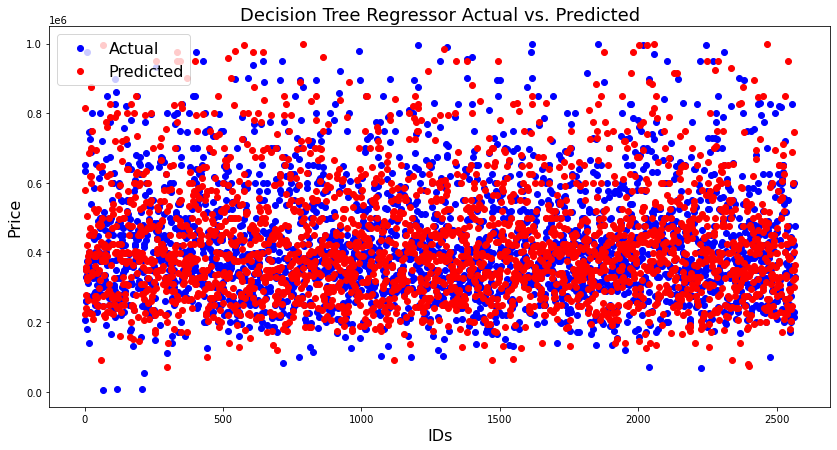

In [29]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Decision Tree Regressor Actual vs. Predicted', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [32]:
# calculate rmse and r2
#rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#r2 = r2_score(y_test,y_pred)

corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2

In [33]:
R_sq

0.5843230640079228

In [41]:
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,y_pred)

13733222233.081808

In [47]:
# rmse metric
math.sqrt(mean_squared_error(y_test,y_pred))

117188.83152025114

In [53]:
# mae
mean_absolute_error(y_test,y_pred)

79351.61472536034

In [53]:
df2.head(25)

,Real Values,Predicted Values
14489,649900.0,999000.0
2779,635000.0,515000.0
2079,205000.0,221900.0
10943,349900.0,348000.0
10993,260000.0,240000.0
4096,260000.0,295000.0
12412,329900.0,335000.0
4433,179500.0,320000.0
12427,375000.0,374900.0
6175,975000.0,699000.0


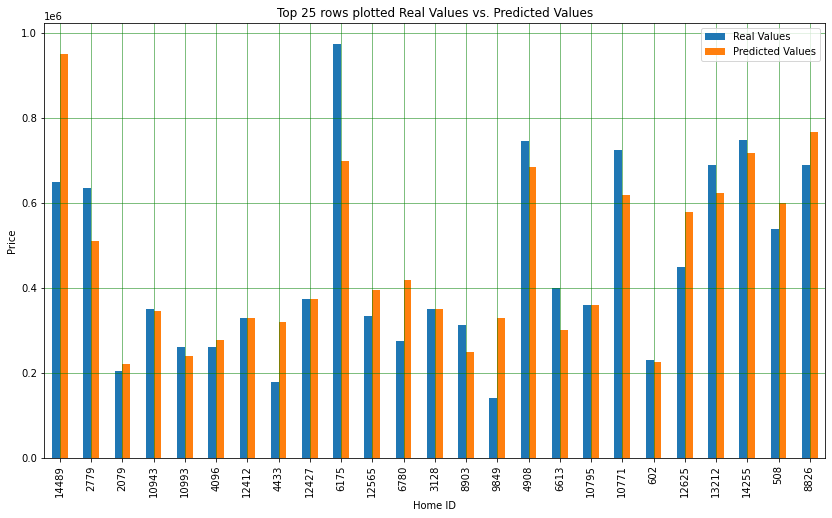

In [67]:
df = df2.head(25)
df.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Top 25 rows plotted Real Values vs. Predicted Values')
plt.xlabel('Home ID')
plt.ylabel('Price')

plt.show()

# Ordinary Least Squares

In [15]:
#variables
# X = df[['zipcode', 'parkingSpaces', 'yearBuilt', 'numPriceChanges', 'numOfAppliances', 'lotSizeSqFt', 'livingAreaSqFt'
#        , 'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
#       'numOfStories', 'parkingSpaces', 'hasCooling', 'hasAssociation', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']].values

X = df_austin_housing[['zipcode', 'latitude', 'longitude', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'parkingSpaces',
       'numPriceChanges', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAppliances',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories']].values

y = df_austin_housing['latestPrice'].values

# split the data in training and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [18]:
#add the column of ones to the inputs to calculate the intercept 
X = sm.add_constant(X)

In [19]:
#create regression model based on ordinary least squares
model = sm.OLS(y, X)

In [20]:
#variable results
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     428.8
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:25:28   Log-Likelihood:            -1.6830e+05
No. Observations:               12834   AIC:                         3.367e+05
Df Residuals:                   12801   BIC:                         3.369e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.059e+08   6.13e+06     17.282      0.0

In [21]:
ypred =  results.predict(X)
print('predicted response:',ypred, sep='\n')

predicted response:
[435214.51184107 339173.29815149 470851.45666487 ... 487513.42055646
 458957.66595778 485362.90421368]


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 1150705.1831530605)

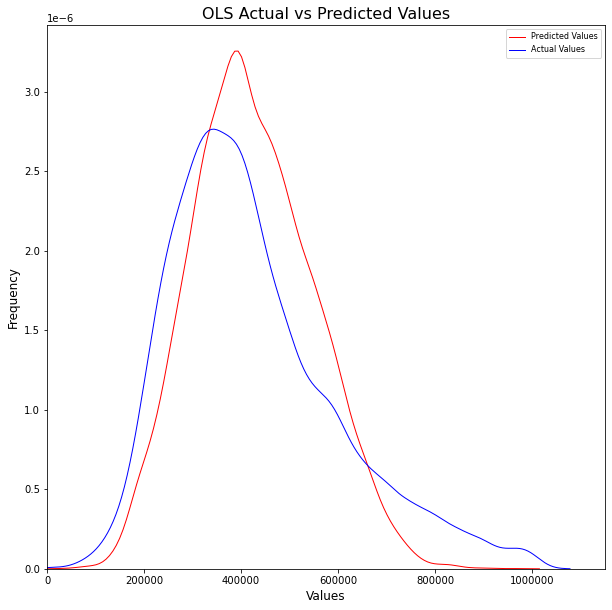

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(ypred, hist = False, color = 'r', label = 'Predicted Values',  kde_kws=dict(linewidth=1))
sns.distplot(y, hist = False, color = 'b', label = 'Actual Values',  kde_kws=dict(linewidth=1))
plt.title('OLS Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0)

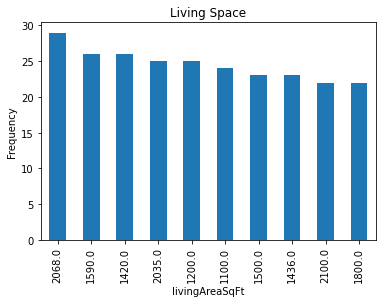

In [24]:
df_austin_housing['livingAreaSqFt'].value_counts().head(10).plot(kind='bar')
plt.title('Living Space')
plt.xlabel('livingAreaSqFt')
plt.ylabel('Frequency')
plt.show()

In [25]:
df_austin_housing["livingAreaSqFt"].mean()

2016.8041140719963

# Gradient Boosted Regression Trees

In [12]:
# importing required Python packages %matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
from scipy import sparse 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics 
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
from pprint import pprint 
import pandas as pd 
from pandas.plotting import scatter_matrix
import urllib 
import requests 
import zipfile 
from io import StringIO
import seaborn


In [ ]:
np.random.seed(sum(map(ord, "aesthetics"))) 
seaborn.set_context('notebook') 

pd.set_option('display.mpl_style', 'default') # make the graphs a bit prettier 
plt.rcParams['figure.figsize'] = (15, 5) 

# set some Pandas options 

pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 25) 
pd.options.display.max_colwidth = 50

In [ ]:
#Load data into a dataframe
current_file = "austinHousingData.csv"

df_austin_housing = pd.read_csv(current_file)